In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import stats
from scipy.stats import gaussian_kde

In [28]:
df = pd.read_csv('data/0.2.csv')
df.head()
m1 = df[['Points:0','Points:1']]
print(m1)

       Points:0  Points:1
0        4.7927  0.096746
1        4.7927  0.095276
2        4.7927  0.090912
3        4.7927  0.083785
4        4.7927  0.074112
...         ...       ...
53423    9.0946  0.234620
53424    9.1438  0.228800
53425    9.4986  0.224260
53426   10.5050  0.229150
53427   15.0380  0.226550

[53428 rows x 2 columns]


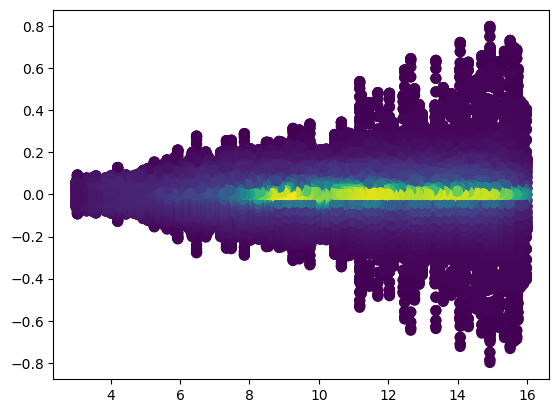

In [32]:
# Generate fake data
x = df['Points:0'].to_numpy()
y = df['Points:1'].to_numpy()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()

C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


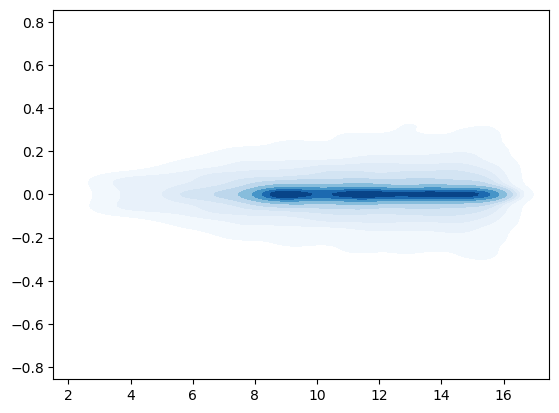

In [33]:
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False)

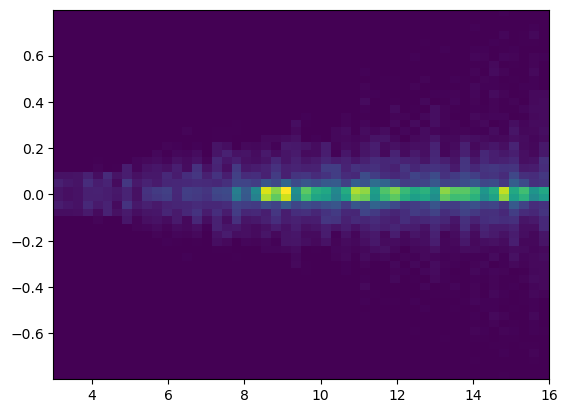

In [34]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.show()

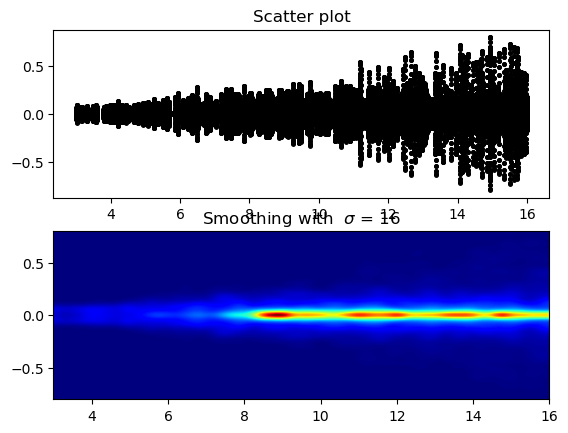

In [35]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 1)

# # Generate some test data
# x = np.random.randn(1000)
# y = np.random.randn(1000)

sigmas = [0, 16]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

[[ 3.0403   -0.092567]
 [14.932    -0.79825 ]
 [15.516    -0.7319  ]
 [15.707    -0.68734 ]
 [15.986    -0.40375 ]
 [16.       -0.17058 ]
 [16.        0.17058 ]
 [15.986     0.40375 ]
 [15.707     0.68734 ]
 [15.516     0.7319  ]
 [14.932     0.79825 ]
 [ 3.0403    0.092567]
 [ 2.9994    0.058095]
 [ 2.9994   -0.058095]]


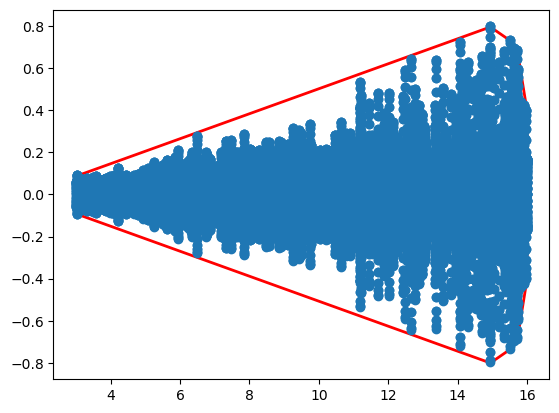

In [41]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib.collections import PolyCollection


fig, ax = plt.subplots()

# length = 1000

#using some normally distributed data as example:
x = df['Points:0'].to_numpy()
y = df['Points:1'].to_numpy()

length = len(x)

points = np.concatenate([x,y]).reshape((2,length)).T
hull = ConvexHull(points)



ax.scatter(x,y)

print(points[hull.vertices,:])

ax.add_collection(PolyCollection(
    [points[hull.vertices,:]],
    edgecolors='r',
    facecolors='w',
    linewidths=2,
    zorder=-1,
    ))



plt.show()

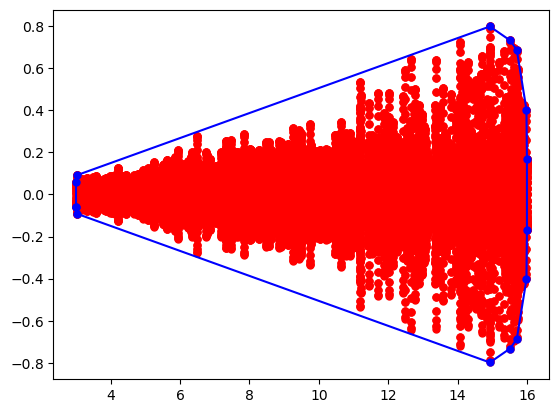

In [43]:
import random
import sys
import matplotlib.pyplot as plt

CLOCKWISE = -1
COLLINEAR = 0
COUNTERCLOCKWISE = +1
eps = sys.float_info.epsilon


def orientation(a, b):
    x0, y0 = a
    x1, y1 = b
    cross = x0 * y1 - x1 * y0
    if cross > eps:
        return COUNTERCLOCKWISE
    elif cross < -eps:
        return CLOCKWISE
    else:
        return COLLINEAR


def same_halfplane(a, b):
    x0, y0 = a
    x1, y1 = b
    dot = x0 * x1 + y0 * y1
    if dot >= eps:
        return True
    elif dot < eps:
        return False


def jarvis(points):
    """
    http://cgi.di.uoa.gr/~compgeom/pycgalvisual/whypython.shtml
    Jarvis Convex Hull algorithm.
    """
    points = points[:]
    r0 = min(points)
    hull = [r0]
    r, u = r0, None
    remainingPoints = [x for x in points if x not in hull]
    while u != r0 and remainingPoints:
        u = random.choice(remainingPoints)
        for t in points:
            a = (u[0] - r[0], u[1] - r[1])
            b = (t[0] - u[0], t[1] - u[1])
            if (t != u and
                (orientation(a, b) == CLOCKWISE or
                 (orientation(a, b) == COLLINEAR and
                  same_halfplane(a, b)))):
                u = t
        r = u
        points.remove(r)
        hull.append(r)
        try:
            remainingPoints.remove(r)
        except ValueError:
            # ValueError: list.remove(x): x not in list
            pass
    return hull

if __name__ == '__main__':
    x = df['Points:0'].to_numpy()
    y = df['Points:1'].to_numpy()
    points = list(zip(x, y))
    hull = jarvis(points)
    px, py = zip(*points)
    hx, hy = zip(*hull)
    plt.plot(px, py, 'r.', markersize=10)
    plt.plot(hx, hy, 'b.-', markersize=10)
    plt.show()

In [44]:
from scipy.spatial import Delaunay
import numpy as np

# https://stackoverflow.com/questions/50549128/boundary-enclosing-a-given-set-of-points

#  matlab boundary - https://stackoverflow.com/questions/31836709/what-algorithm-does-matlabs-boundary-function-use

# https://www.mathworks.com/help/matlab/ref/boundary.html

#  javascript implementation of hull - https://github.com/AndriiHeonia/hull

# alpha shape https://en.wikipedia.org/wiki/Alpha_shape
# https://doc.cgal.org/latest/Alpha_shapes_2/index.html

def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


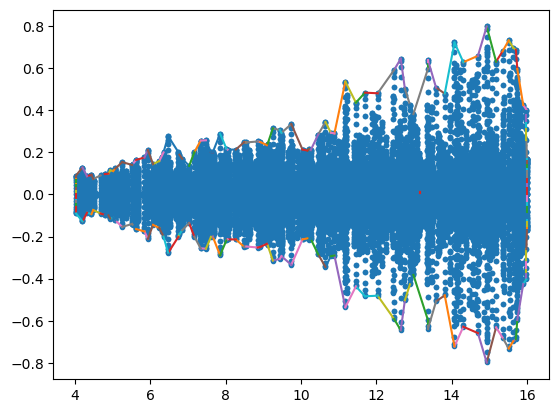

In [85]:

# # Constructing the input point data
x = df['Points:0'].to_numpy()
y = df['Points:1'].to_numpy()

inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0))
# print(inside)
points = np.vstack([x[inside], y[inside]]).T
# print(points)

# Constructing the input point data
# np.random.seed(0)
# x = 3.0 * np.random.rand(2000)
# y = 2.0 * np.random.rand(2000) - 1.0
# inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0))
# points = np.vstack([x[inside], y[inside]]).T

# Computing the alpha shape
edges = alpha_shape(points, alpha=0.25, only_outer=True)



# Plotting the output
plt.figure()
plot(points[:, 0], points[:, 1], '.')
# plt.ylim([-1, 1])
for i, j in edges:
#     print(i, j, points[[i, j], 0], points[[i, j], 1])
    
    plt.plot(points[[i, j], 0], points[[i, j], 1])


plt.show()

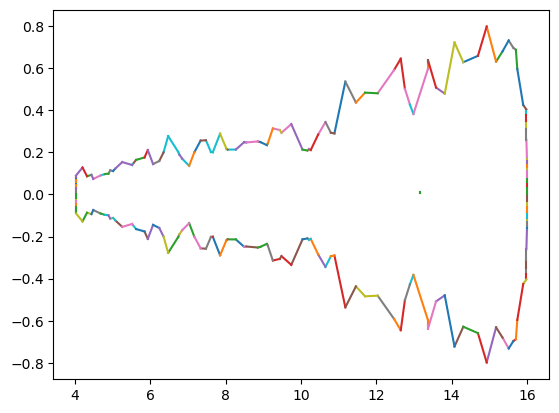

In [86]:
plt.figure()
# plt.ylim([-1, 1])
for i, j in edges:
#     print(i, j, points[[i, j], 0], points[[i, j], 1])
    
    plt.plot(points[[i, j], 0], points[[i, j], 1])


plt.show()

In [69]:
def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

In [71]:
stitch_boundaries(edges)

[[(47361, 47394),
  (47394, 47362),
  (47362, 47393),
  (47393, 47363),
  (47363, 47392),
  (47392, 47364),
  (47364, 47769),
  (47769, 47800),
  (47800, 47391),
  (47391, 49099),
  (49099, 49654),
  (49654, 52605),
  (52605, 49506),
  (49506, 49357),
  (49357, 50394),
  (50394, 50060),
  (50060, 50025),
  (50025, 50059),
  (50059, 50026),
  (50026, 50058),
  (50058, 50027),
  (50027, 50057),
  (50057, 50028),
  (50028, 6918),
  (6918, 8657),
  (8657, 8695),
  (8695, 6105),
  (6105, 9102),
  (9102, 7769),
  (7769, 29340),
  (29340, 50653),
  (50653, 49725),
  (49725, 49694),
  (49694, 29192),
  (29192, 51207),
  (51207, 50467),
  (50467, 50098),
  (50098, 49949),
  (49949, 50357),
  (50357, 50579),
  (50579, 51097),
  (51097, 52124),
  (52124, 50949),
  (50949, 50986),
  (50986, 29193),
  (29193, 29230),
  (29230, 31265),
  (31265, 30228),
  (30228, 29452),
  (29452, 29822),
  (29822, 29896),
  (29896, 30007),
  (30007, 30044),
  (30044, 31894),
  (31894, 29859),
  (29859, 52108),
  (5

4

25